## Observations and Insights 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
# Display the data table for preview
mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [56]:
mouse_study_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [57]:
# Checking the number of mice.

mouse_study_df['Mouse ID'].count()


1893

In [58]:
mouse_study_df['Mouse ID'].count()
mouse_study_df.duplicated().sum()

1

In [59]:
mouse_study_df[['Mouse ID', 'Timepoint']].drop_duplicates()

,Mouse ID,Timepoint
0,b128,0
1,f932,0
2,g107,0
3,a457,0
4,c819,0
...,...,...
1888,r944,45
1889,u364,45
1890,p438,45
1891,x773,45


In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_dup=mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_study_dup

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df.loc[mouse_study_df.duplicated(), :]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study = mouse_study_df[mouse_study_df["Mouse ID"].isin(mouse_study_dup)==False]
clean_mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study["Mouse ID"].nunique()



248

In [64]:
clean_mouse_study_df = clean_mouse_study
clean_mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

c_mouse_study_df_group=clean_mouse_study.groupby(['Drug Regimen'])

c_mouse_study_mean=c_mouse_study_df_group['Tumor Volume (mm3)'].mean()
c_mouse_study_median=c_mouse_study_df_group['Tumor Volume (mm3)'].median()
c_mouse_study_var=c_mouse_study_df_group['Tumor Volume (mm3)'].var()
c_mouse_study_std=c_mouse_study_df_group['Tumor Volume (mm3)'].std()
c_mouse_study_sem=c_mouse_study_df_group['Tumor Volume (mm3)'].sem()

summary_mouse_study = pd.DataFrame([c_mouse_study_mean, c_mouse_study_median, c_mouse_study_var, c_mouse_study_std,c_mouse_study_sem])

c_mouse_sum_stats= summary_mouse_study.T

c_mouse_sum_stats.columns = ['c_mouse_study_mean','c_mouse_study_median','c_mouse_study_var', 'c_mouse_study_std','c_mouse_study_sem']

c_mouse_sum_stats2=c_mouse_sum_stats.rename(columns = {"c_mouse_study_mean":"Mean Tumor Volume (mm3)","c_mouse_study_median":"Median Tumor Volume (mm3)","c_mouse_study_var":"Variance Tumor Volume (mm3)", "c_mouse_study_std":"Standard Deviation Tumor Volume (mm3)","c_mouse_study_sem":"SEM Tumor Volume (mm3)"}, inplace = False)

#overall summary per drug
c_mouse_sum_stats2.head(20)

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
mouse_study_summary = pd.DataFrame(mouse_study_df.groupby("Drug Regimen").count())
mouse_study_summary['Mean'] = mouse_study_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mouse_study_summary['Median'] = mouse_study_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mouse_study_summary['Variance'] = mouse_study_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
mouse_study_summary['Standard Deviation'] = mouse_study_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
mouse_study_summary['SEM'] = mouse_study_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_summary = mouse_study_summary[["Mouse ID", "Mean", "Median", "Variance", "Standard Deviation", "SEM"]]

# Clean dataframe
mouse_study_summary['Mean'] = mouse_study_summary['Mean'].map("{:,.4f}".format)
mouse_study_summary['Median'] = mouse_study_summary['Median'].map("{:,.4f}".format)
mouse_study_summary['Variance'] = mouse_study_summary['Variance'].map("{:,.4f}".format)
mouse_study_summary['Standard Deviation'] = mouse_study_summary['Standard Deviation'].map("{:,.4f}".format)
mouse_study_summary['SEM'] = mouse_study_summary['SEM'].map("{:,.4f}".format)

#Summary including the Mouse ID
mouse_study_summary


,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,178,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,178,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,188,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,186,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,181,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,161,52.3226,50.8546,42.3511,6.5078,0.5129
Ramicane,228,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,181,54.2331,52.4317,59.4506,7.7104,0.5731


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}
                                            ).rename(columns={'mean':'Mean', 'median':'Median', 
                                                              'var':'Variance', 'std':'Standard Deviation', 'sem':'SEM'})


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

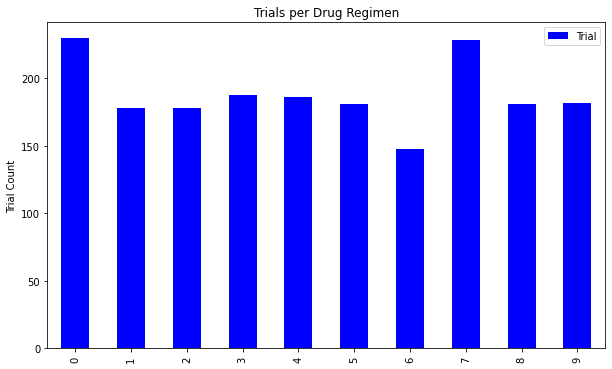

<Figure size 432x288 with 0 Axes>

In [61]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


mouse_study_summary = pd.DataFrame(clean_mouse_study.groupby(["Drug Regimen"]).count()).reset_index()

# Isolate the columns in the the DataFrame
regimen_data = clean_mouse_study[["Drug Regimen","Mouse ID"]]

# Define data for bar plot so "Drug Regimen" is x-axis label
datapoints = mouse_study_summary [['Mouse ID']]
datapoints = datapoints.rename(columns = {"Mouse ID" : "Trial"})

# Define bar chart information
datapoints.plot(kind="bar", figsize=(10,6), color = "b", legend=True)

plt.title("Trials per Drug Regimen")
plt.ylabel("Trial Count")
plt.show()
plt.tight_layout()


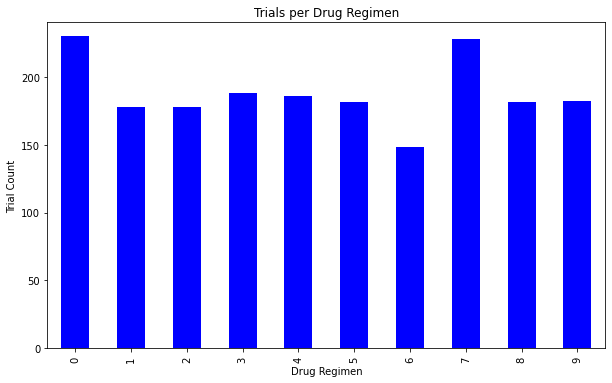

In [62]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

datapoints = mouse_study_summary[["Mouse ID"]]
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Define where to write x label and set chart size
plt.figure(figsize=(10,6))
plt.bar(x_axis, datapoints["Mouse ID"], color="b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-.5, len(x_axis)-.5)
plt.ylim(0, max(datapoints["Mouse ID"])+10)
datapoints = datapoints.rename(columns = {"Mouse ID" : "Trial"})

# Set title and labels
plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Trial Count")

# Save and display graph
plt.show()



<AxesSubplot:ylabel='Sex'>

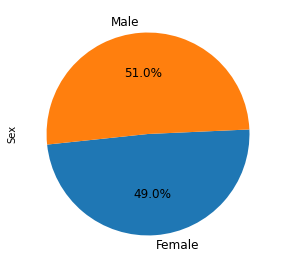

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_mouse_study.groupby('Sex')
gender_qty = gender["Sex"].count()


plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect = 'equal')
gender_qty.plot(kind='pie', y = "Quantity", ax=ax1, autopct = '%1.1f%%',
              startangle = 186, shadow = False, legend = False, fontsize = 12)


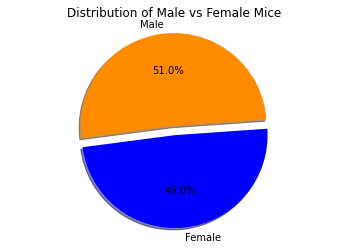

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_mouse_study["Sex"].value_counts()

#Labels sections of the pie plot
labels = ["Male", "Female"]

# Define colors of each section of pie plot
colors = ["darkorange", "blue"]

# Define counts
counts = np.array(gender)

# Define each section
explode = (0.1, 0)

# Direct matplotlib to create a pie chart based upon the above data
plt.pie(gender, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 364)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice")

# Display pie plot
plt.show()



## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Define DataFrames of Ramicane, Capomulin, Propriva and Ceftamin
capomulin2_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Ceftamin", :]

# Ramicane - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_max)

# Merge new data to dataframe
ramicane_merge = pd.merge(ramicane_vol, clean_mouse_study, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head()

# Ramicane - Calculate the final tumor volume with drug regimen Ramicane
tumor_ramicane = ramicane_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ramicane regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

# Capomulin - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
capomulin_max = capomulin2_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_max)

# Merge new data to dataframe
capomulin_merge = pd.merge(capomulin_vol, clean_mouse_study, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

# Calculate the final tumor volume
tumor_capomulin = capomulin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#output for Capomulin
print(f"For Capomulin regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

# Infubinol - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_max)

# Merge new data to dataframe
infubinol_merge = pd.merge(infubinol_vol, clean_mouse_study, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge.head()

# Infubinol - Calculate the final tumor volume with drug regimen Infubinol
tumor_infubinol = infubinol_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#output for Infubinol
print(f"For Infubinol regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

# Ceftamin - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_max)

# Merge new data to dataframe
ceftamin_merge = pd.merge(ceftamin_vol, clean_mouse_study, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head()

# Ceftamin - Calculate the tumor volume with drug regimen
tumor_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Output for Ceftamin
print(f"For Ceftamin regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")



For Ramicane regimen, please note the following:
The upper quartile of tumor volume is: 40.65900627.
The lower quartile of tumor volume is: 31.56046955.
The interquartile range of tumor volme is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.
For Capomulin regimen, please note the following:
The upper quartile of tumor volume is: 40.1592203.
The lower quartile of tumor volume is: 32.37735684.
The interquartile range of tumor volme is: 7.781863460000004.
The median of tumor volume is: 38.125164399999996.
Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.
For Infubinol regimen, please note the following:
The upper quartile of tumor volume is: 65.52574285.
The lower quartile of tumor volume is: 54.04860769.
The interquartile range of tumor volme is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values above 82.741445590

In [66]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

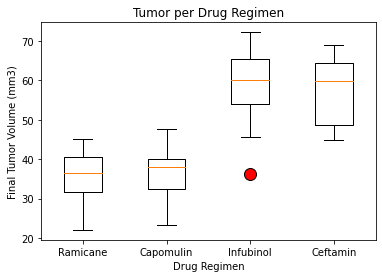

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data_to_plot = [tumor_ramicane, tumor_capomulin, tumor_infubinol, tumor_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor per Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

outlier_dot = dict(markerfacecolor='red',markersize=12)

ax1.boxplot(tumor_data_to_plot, labels=["Ramicane","Capomulin","Infubinol","Ceftamin",],flierprops=outlier_dot)

plt.savefig('boxplot')
plt.show()



## Line and Scatter Plots

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


Text(0.5, 1.0, 'Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment')

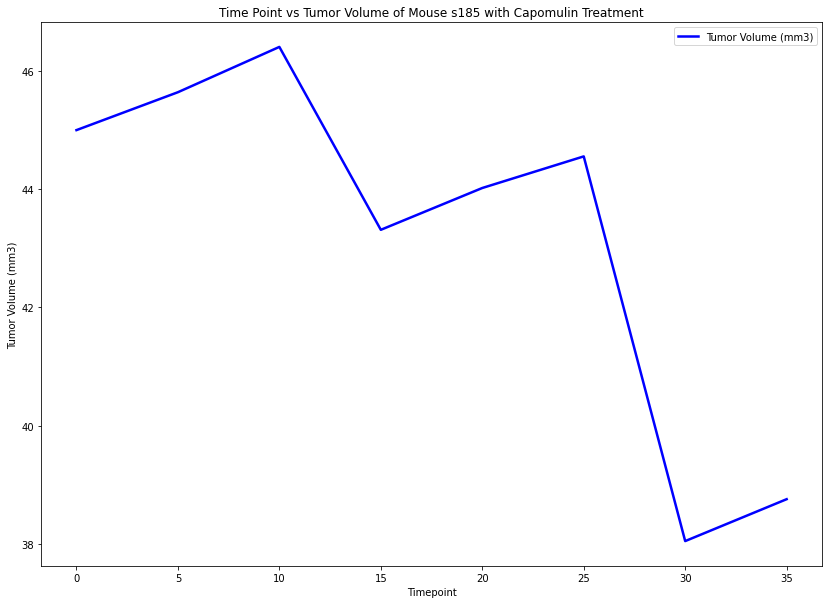

In [69]:
# Isolate data of a single mouse (j246)

capomulin_j246_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "j246"]
capomulin_j246_df.head()

# Isolate columns of single mouse (j246)
capomulin_j246_df = capomulin_j246_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]

# Set the index of capomulin_s185_df
capomulin_j246_df = capomulin_j246_df.reset_index(drop=True)

# Generate a line plot of time point versus tumor volume for a mouse (s185) treated with Capomulin
capomulin_j246_df.set_index('Timepoint').plot(figsize=(14,10), linewidth=2.5, color='blue')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment")

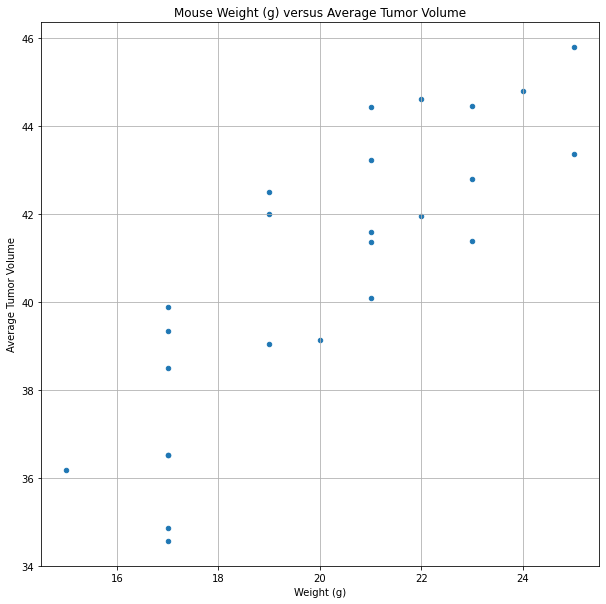

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head()

# Isolate columns of Capomulin
capomulin_filtered_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_filtered_df.head()

# Calculate the average tumor volume per mouse and weight with drug regimen = Capomulin
capomulin_mean = pd.DataFrame(capomulin_filtered_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename tumor volume column to Average Tumor Volume
capomulin_mean = capomulin_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_mean.head()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean = capomulin_mean.set_index('Mouse ID')

capomulin_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(10,10), 
                    title="Mouse Weight (g) versus Average Tumor Volume")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


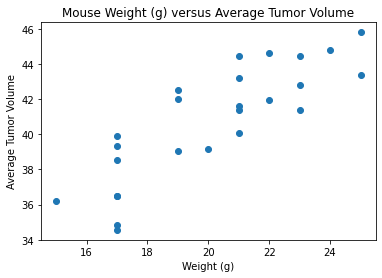

Predicted y is 42.54983369121531 vs an actual value of 41.963635634
The r-squared is: 0.7088568047708717


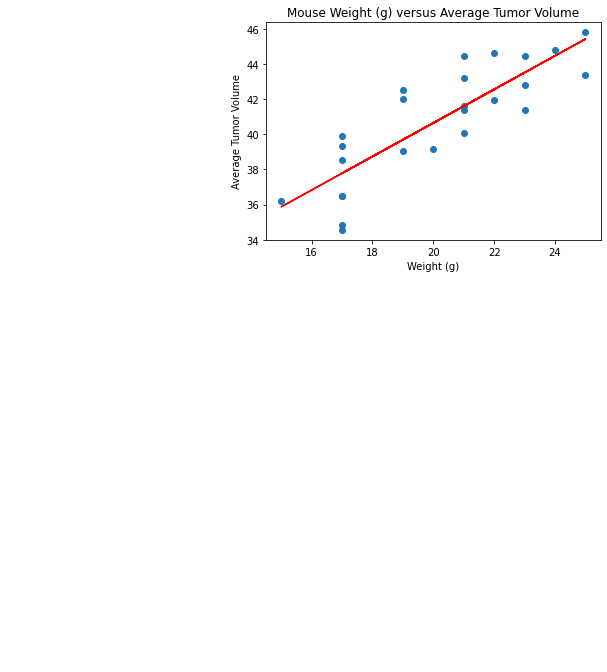

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Isolate mouse weight and average tumor volume
mouse_weight = capomulin_mean.iloc[:,0]
average_tumor_volume = capomulin_mean.iloc[:,1]

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

# Create beginning steps for linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
plt.show()

# Add the linear regression equation and line to plot
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Check x values
x_values

# y=mx+b
y=slope*x_values[0]+intercept
print(f'Predicted y is {y} vs an actual value of {y_values[0]}')

# Calculate regress values, r-squared, etc
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()